In [1]:
import shap

import pandas as pd
import random
import pickle as pkl

# to do: change baseline to other name
from utilities import knight_data_processing
from utilities import model_training_utils
from utilities import create_summary_statistics_knight_data

import matplotlib.pyplot as plt

### Definition of variables

In [2]:
N_RUNS = 10

RISK_CLASSES = ['risk_label_0', 'risk_label_1', 'risk_label_2', 'risk_label_3', 'risk_label_4']

### Load processed clinical data

In [3]:
df = knight_data_processing.process_KNIGHT_clinical_data(data_path = 'KNIGHT/knight/data/knight.json', 
                                 processed_file_name=None)
df = knight_data_processing.beautify_column_names(df)

In [4]:
df.head()

,Age at nephrectomy,Gender,Age when quit smoking,Chewing tobacco use,Alcohol use,Smoking level,Has smoking history,Radiographic size,Body mass index (BMI),Preoperative eGFR value (ml/min),...,Has mild liver disease,Has moderate to severe liver disease,Has AIDS,adj_therapy_label,risk_label,risk_label_0,risk_label_1,risk_label_2,risk_label_3,risk_label_4
case_id,,,,,,,,,,,,,,,,,,,,,
case_00000,49,0,100.0,0.0,1.0,0,0,2.4,29.47,77.0,...,0,0,0,0.0,2,0,0,1,0,0
case_00001,50,0,33.0,0.0,1.0,1,1,2.2,33.71,67.0,...,0,0,0,0.0,1,0,1,0,0,0
case_00002,74,0,100.0,0.0,0.0,2,1,4.5,28.13,NaN,...,0,0,0,1.0,3,0,0,0,1,0
case_00003,44,1,NaN,0.0,1.0,1,1,3.0,38.69,86.0,...,0,0,0,0.0,1,0,1,0,0,0
case_00004,73,0,55.0,0.0,0.0,1,1,3.0,28.59,NaN,...,0,0,0,0.0,1,0,1,0,0,0


### Split data

In [5]:
x_train, y_train, x_val, y_val = knight_data_processing.get_KNIGHT_data_split(df,
                                                train_path = 'KNIGHT/knight/data/knight_train_set.pkl',
                                                 val_path = 'KNIGHT/knight/data/knight_val_set.pkl',
                                                 splits_file_path = 'splits_final.pkl',
                                                )

Number of patients in train: 240 and val: 60


### KNIGHT descriptive statistics

In [6]:
Train = pd.merge(x_train, y_train, left_index=True, right_index=True)
Val = pd.merge(x_val, y_val, left_index=True, right_index=True)

create_summary_statistics_knight_data.print_table_1([('Train', Train), ('Validation', Val)])

,Train,Validation
No. of patients,240,60
Number of women,99 (41.2),21 (35.0)
Age at nephrectomy (y),58 ± 15,62 ± 9
Most recent body mass index,31.0 ± 6.8,30.2 ± 6.3
Preoperative eGFR value (ml/min),73.9 ± 13.8,74.9 ± 17.3
Smoking history,129 (53.8),34 (56.7)
Myocardial infarction history,10 (4.2),3 (5.0)
Has chronic kidney disease,19 (7.9),5 (8.3)
Outcome/Risk group,,
Adjuvant therapy candidacy,65 (27.1),20 (33.3)


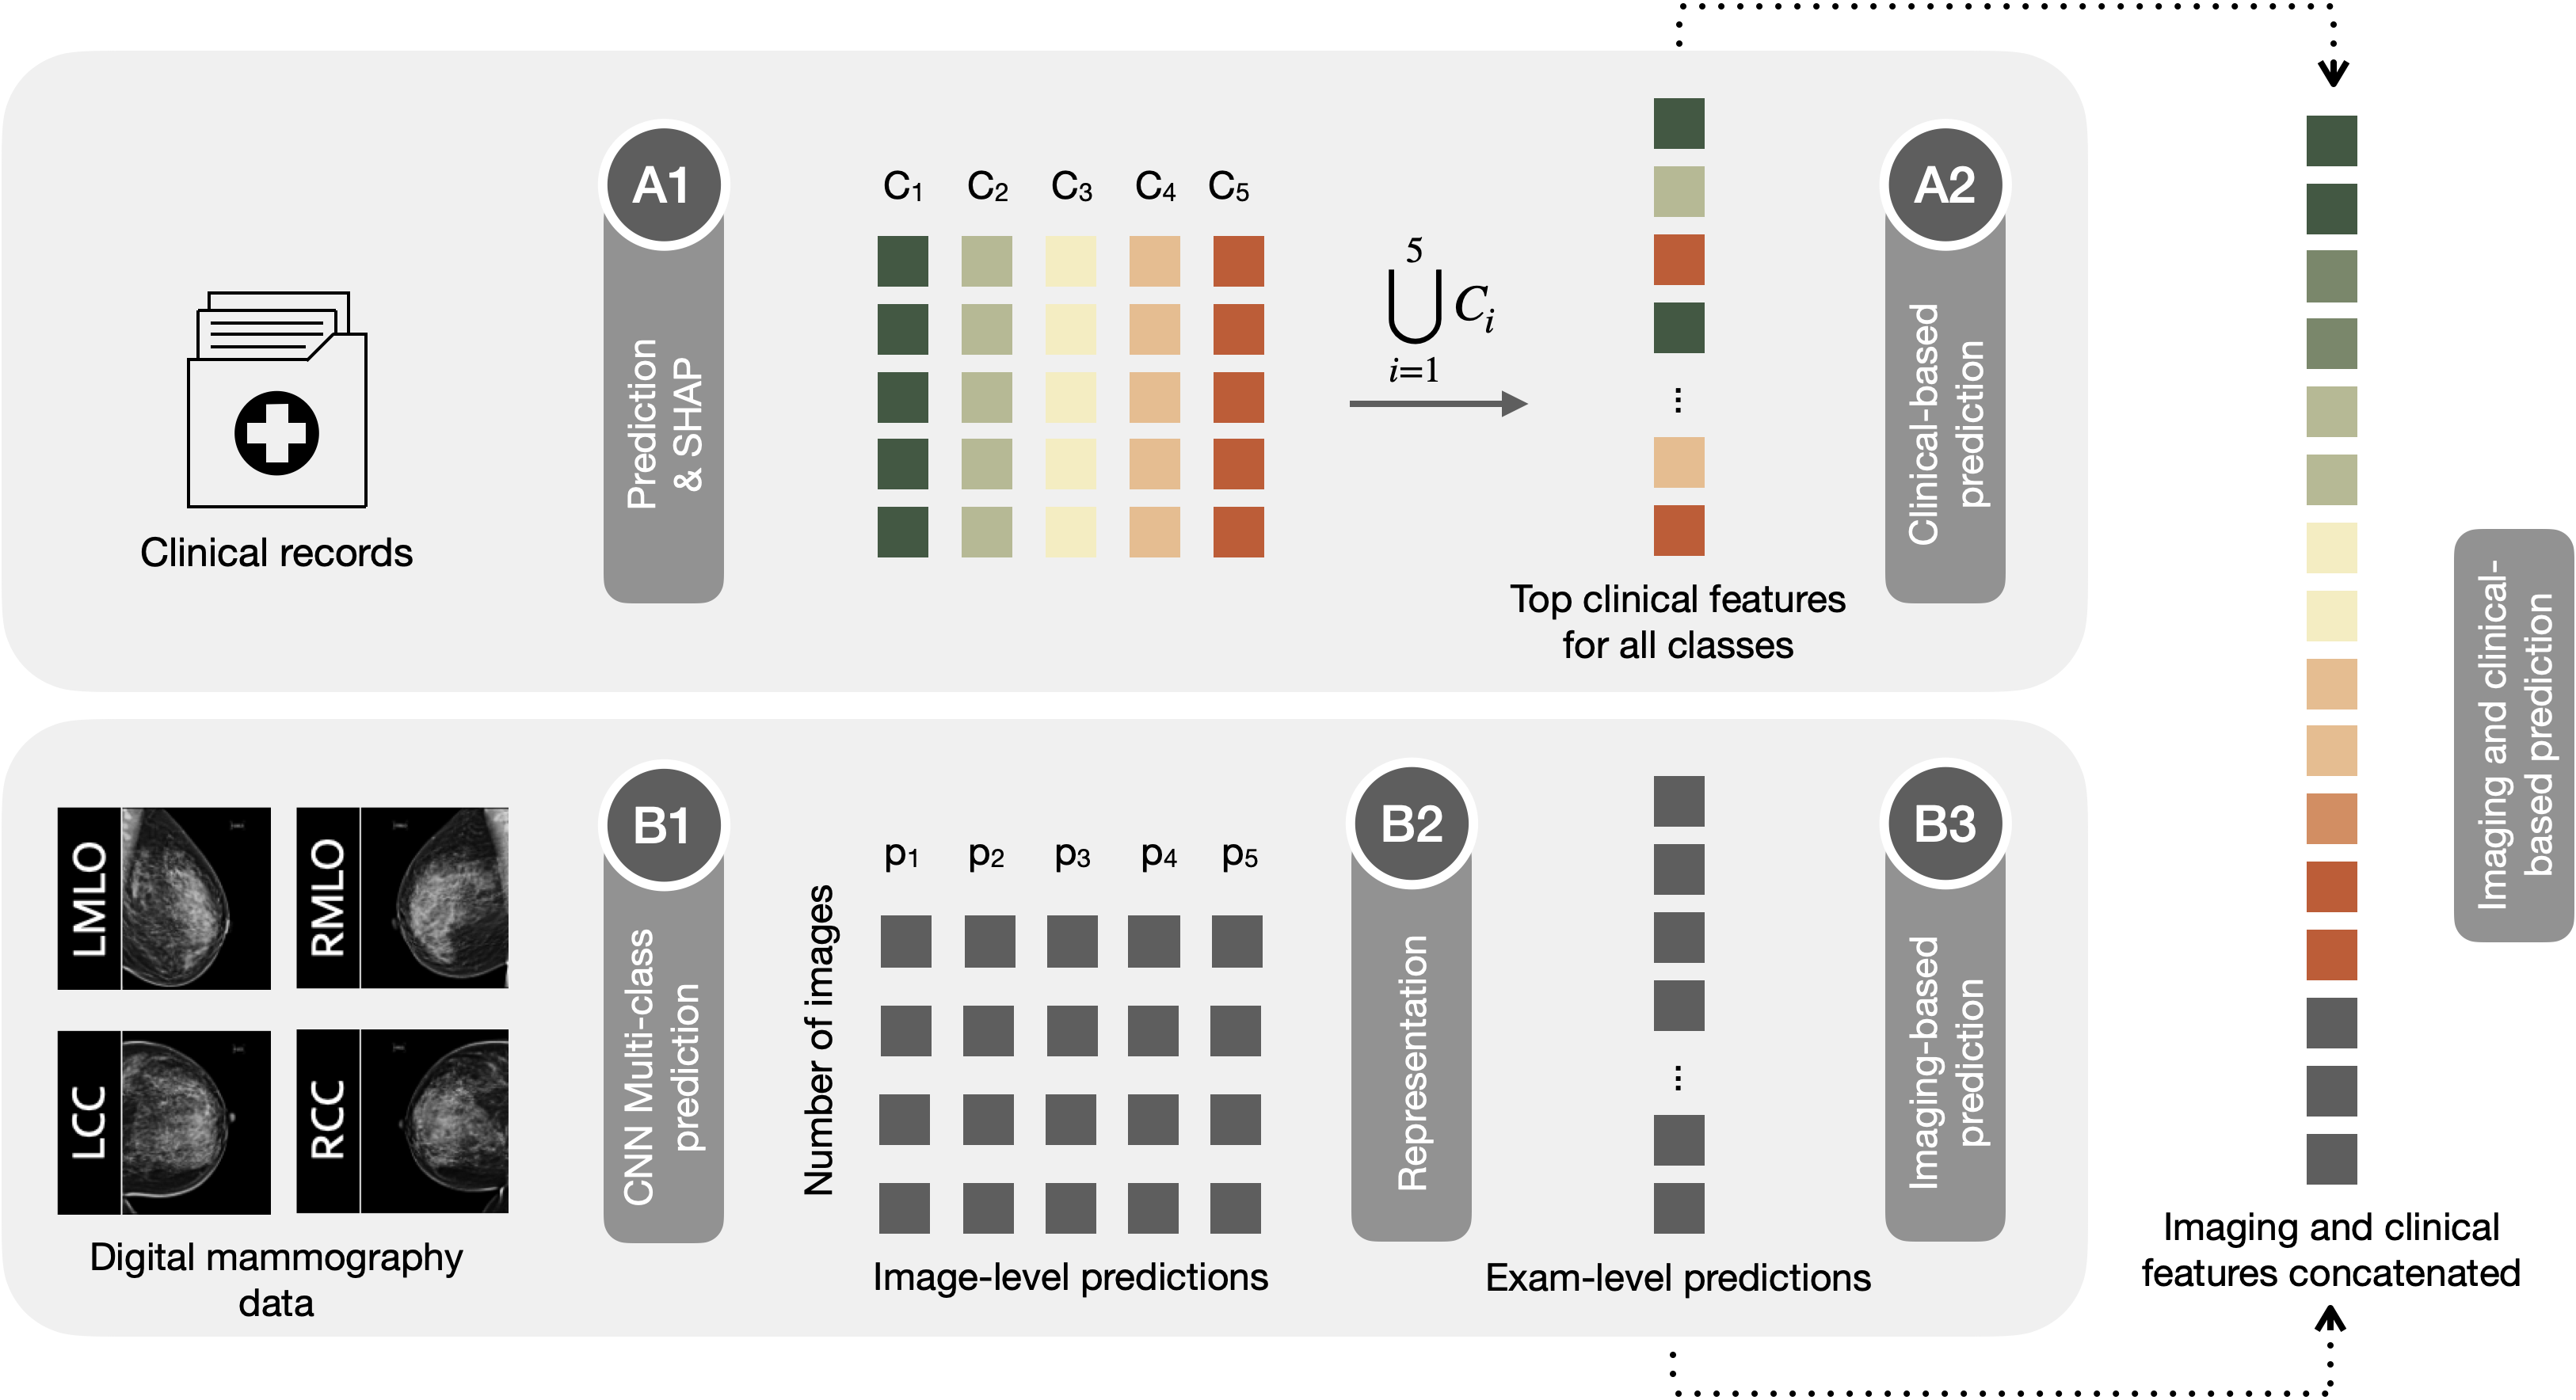

In [7]:
from IPython.display import Image
Image("Fig4.png")

## A1: Train models using all clinical features

In [ ]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'all_clinical_feats', n_iter = N_RUNS, risk_class = risk_class)

### Plot AUCs

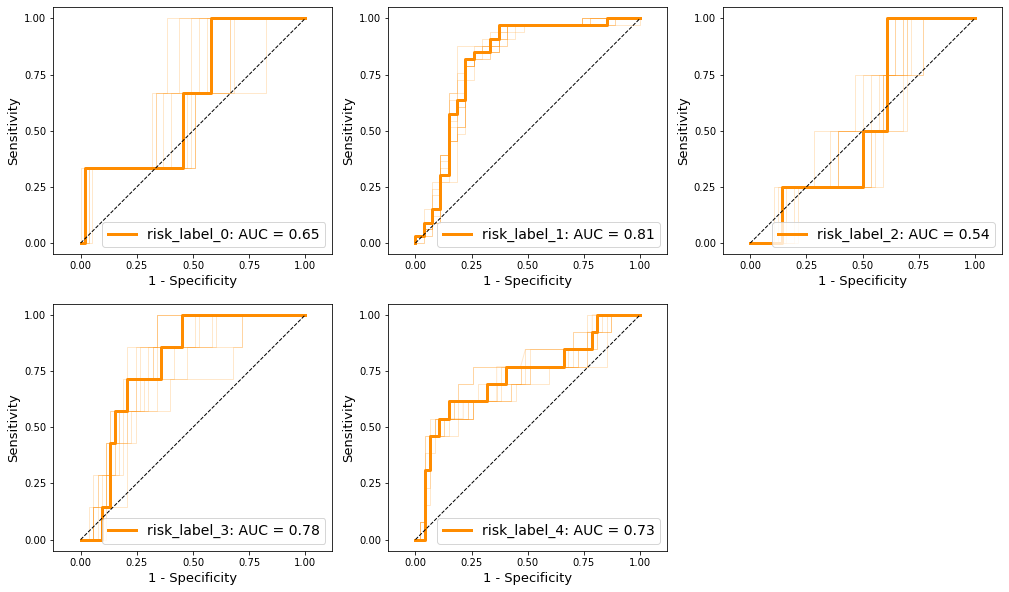

In [8]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(17, 10)

model_training_utils.plot_AUC_validation_set(ax[0,0], feature_set = 'all_clinical_feats', risk_class = 'risk_label_0')
model_training_utils.plot_AUC_validation_set(ax[0,1], feature_set = 'all_clinical_feats', risk_class = 'risk_label_1')
model_training_utils.plot_AUC_validation_set(ax[0,2], feature_set = 'all_clinical_feats', risk_class = 'risk_label_2')
model_training_utils.plot_AUC_validation_set(ax[1,0], feature_set = 'all_clinical_feats', risk_class = 'risk_label_3')
model_training_utils.plot_AUC_validation_set(ax[1,1], feature_set = 'all_clinical_feats', risk_class = 'risk_label_4')
fig.delaxes(ax[1,2]) 

### Feature contribution (SHAP analysis)

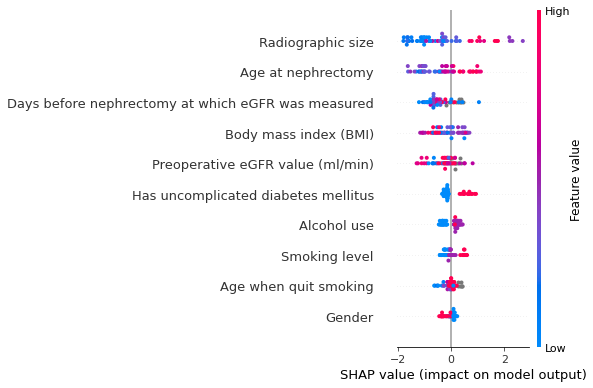

In [9]:
fig, axs = plt.subplots()
fig.set_size_inches(5, 8)

model_training_utils.show_shap_summary_plot (feature_set = 'all_clinical_feats',
                                             risk_class = 'risk_label_3',
                                             model_index = 3, x_val = x_val)

### Find top clinical features for all classes

In [12]:
subset_clinical_feats = model_training_utils.get_feature_importance (classes = RISK_CLASSES,
                                                n_iter = N_RUNS, 
                                                feature_set = 'all_clinical_feats',
                                                n_top_features = 10, 
                                                x_val = x_val)

Most contributing features to the prediction of all classes are:

Body mass index (BMI), Radiographic size, Gender, Smoking level, Age when quit smoking, Age at nephrectomy, Has smoking history, Alcohol use, Days before nephrectomy at which eGFR was measured, Has uncomplicated diabetes mellitus, Has peripheral vascular disease, Preoperative eGFR value (ml/min)


## A2: Prediction with subset of features

In [13]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'subset_clinical_feats', n_iter = N_RUNS, risk_class = risk_class)

NameError: name 'subset_clinical_feats' is not defined

#### integrate imaging features

In [ ]:
# predictions_examinations_MG = vb.transform_CNN_imaging_predictions_into_MG_examination_predictions()